In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from optimus_prime.dataloader import *

In [ ]:
df = pd.read_csv("..\data\SERSIC\delight_sersic.csv", dtype={'objID': 'Int64'})[:100]
h2f_multires_imgs = np.load("..\data\h2f_ps1_multires_100_examples.npy")

In [3]:
ser_columns = [
    "objID", "host_ra", "host_dec", "hostsize",
    "rSerRadius", "rSerAb", "rSerPhi", "rSerChisq", "rSerRa", "rSerDec",
]


#Veremos los casos en los que tengamos metadata de Sérsic
mask_notna = df[ser_columns].notna().all(axis=1)

df_sersic_raw = df[mask_notna]

mask_final_idx = df_sersic_raw.drop_duplicates(subset="objID").index

df_sersic = df_sersic_raw.drop_duplicates(subset="objID")
h2f_sersic = h2f_multires_imgs[mask_final_idx]

In [4]:
h2f_sersic.shape

(15, 270, 270, 5)

### Auto-Labeling

In [5]:
dataset =  DelighDataset(
        imgs = h2f_sersic,
        sn_pos = None,
        sersic_radius = df_sersic["rSerRadius"].values.astype(np.float32),
        sersic_ab = df_sersic["rSerAb"].values.astype(np.float32),
        sersic_phi = df_sersic["rSerPhi"].values.astype(np.float32),
        augmentation = "auto-labeling")

In [6]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

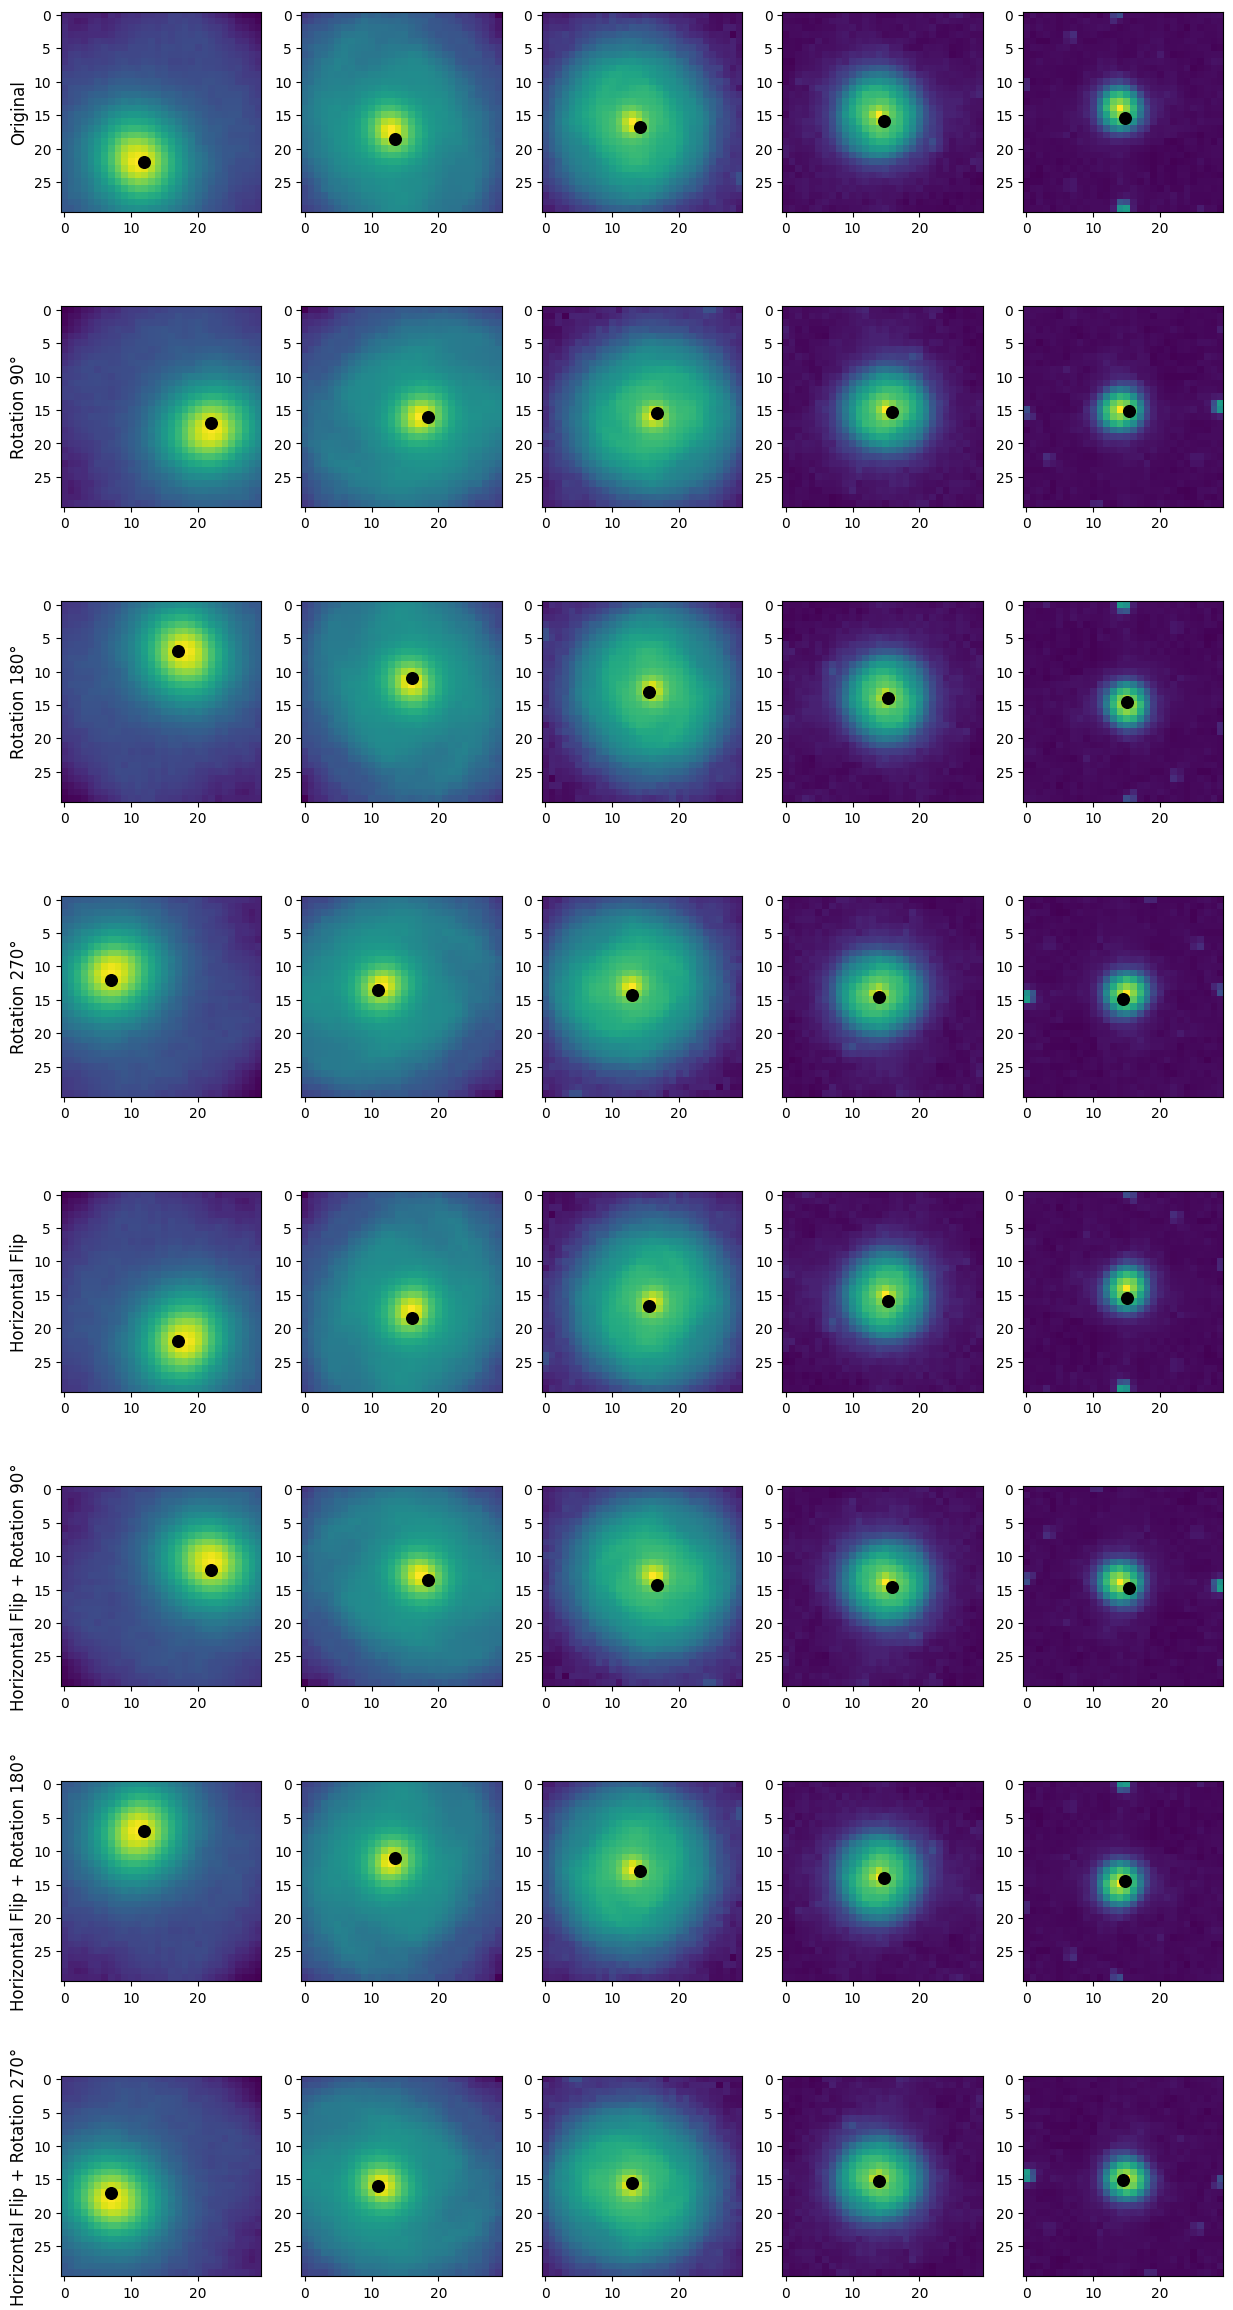

In [16]:
idx = 5
example = dataset[idx]

fig, axs = plt.subplots(8,5, figsize=(15,30))

for pos, trans_name in transformations.items():
    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) +15) , (example[1][pos][1]/(2**m)+15), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()

### Delight

In [ ]:
X_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy")

In [18]:
dataset =  DelighDataset(
        imgs = X_train,
        sn_pos = y_train.astype(np.float32),
        sersic_radius = None,
        sersic_ab = None,
        sersic_phi = None,
        augmentation = "delight")

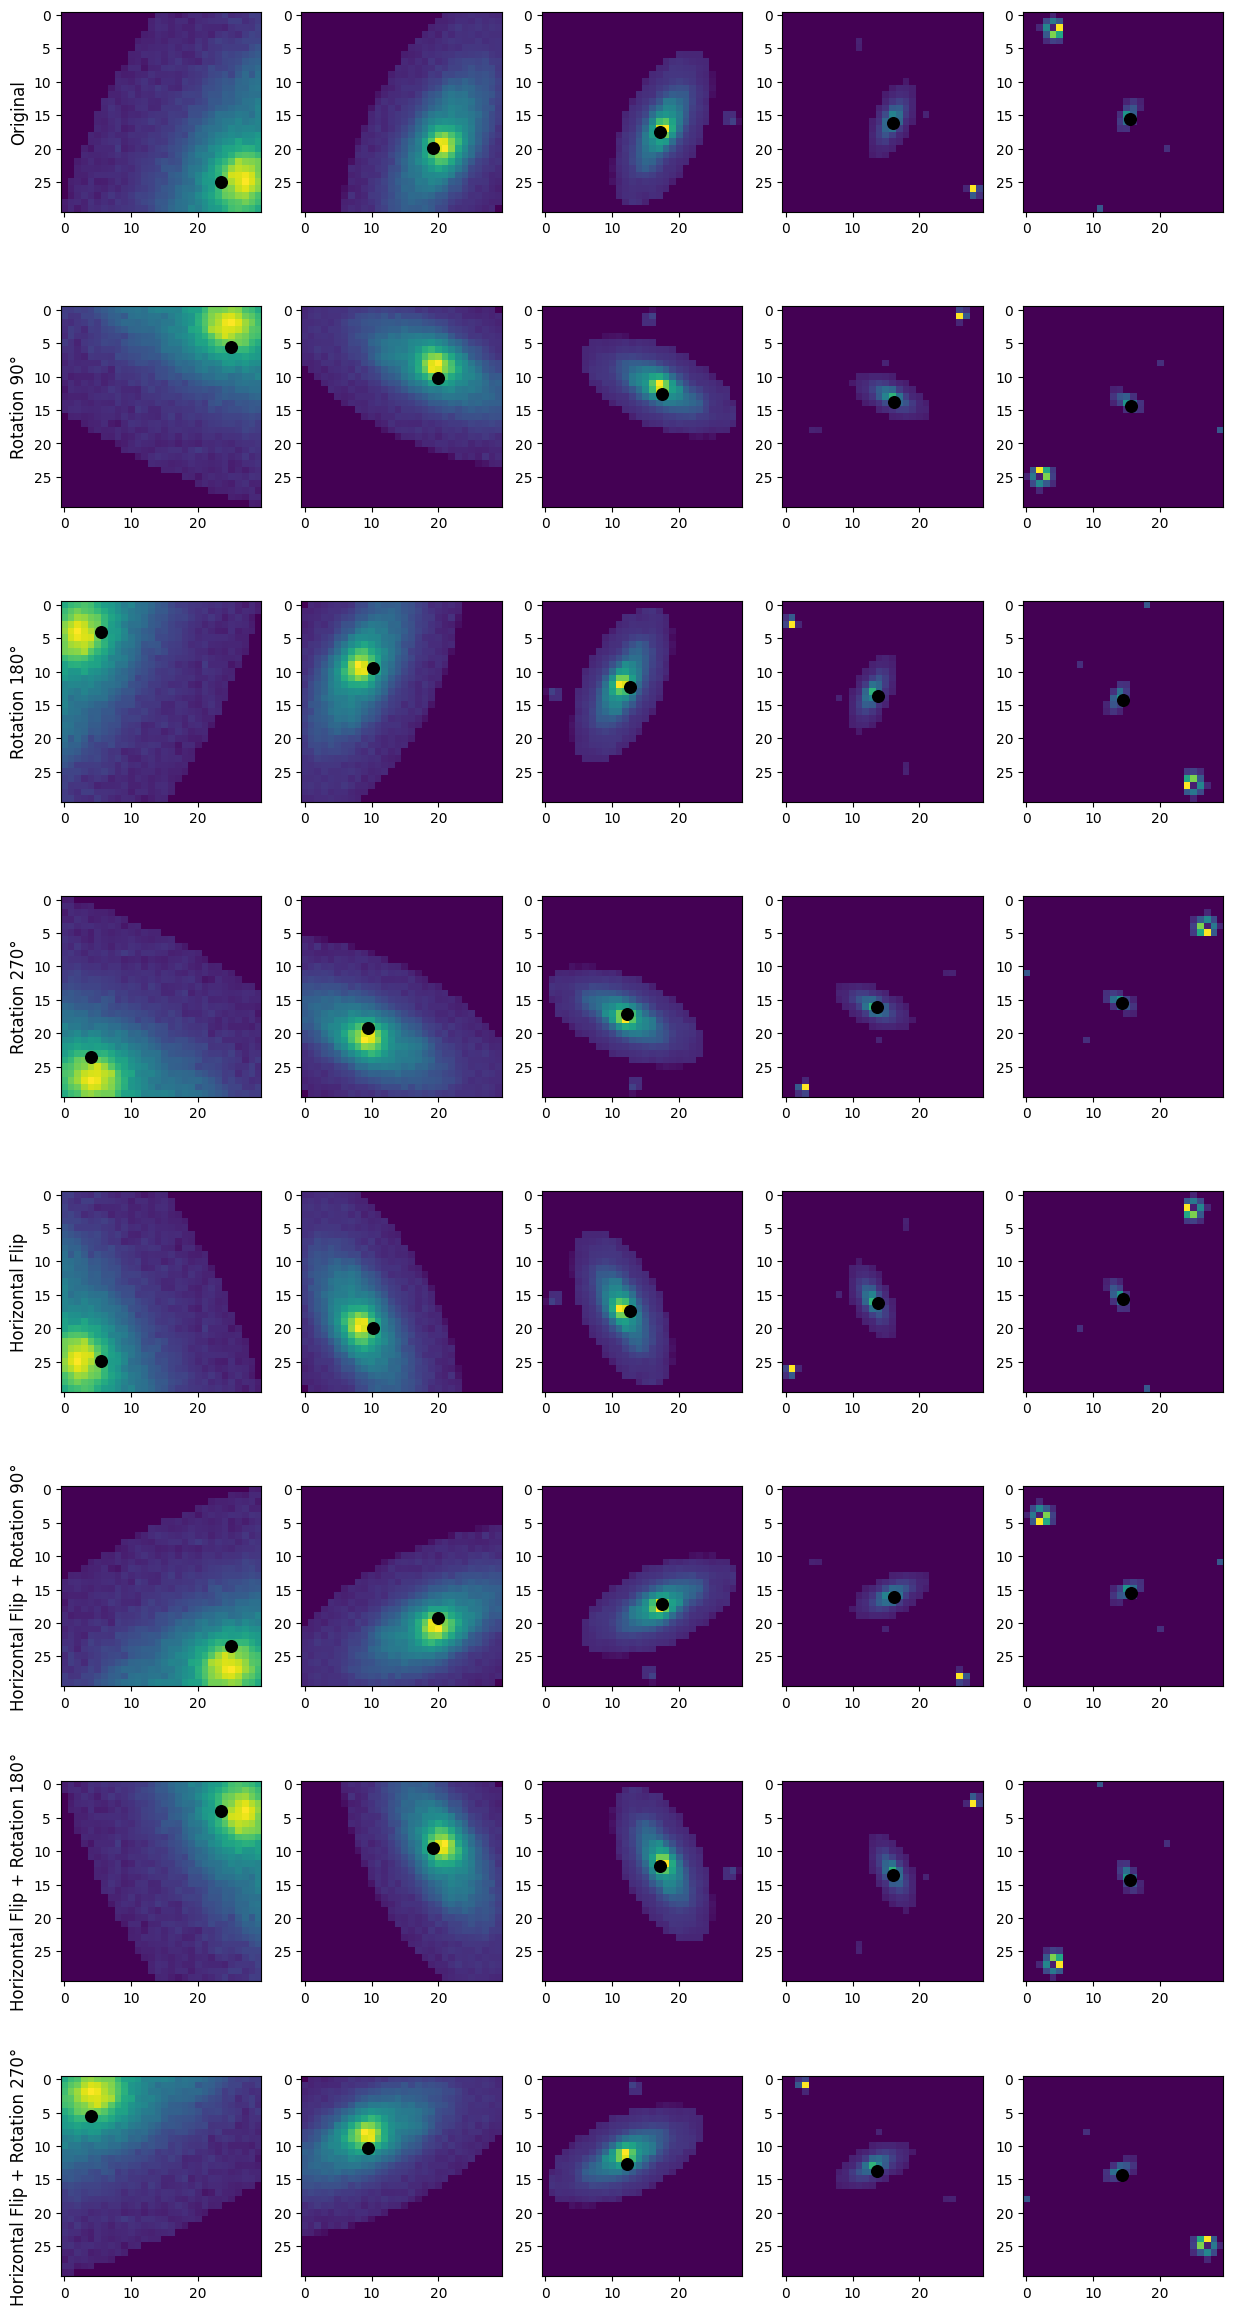

In [19]:
idx = 1
example = dataset[idx]

fig, axs = plt.subplots(8,5, figsize=(15,30))

for pos, trans_name in transformations.items():
    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) +15) , (example[1][pos][1]/(2**m)+15), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()